# IA learns logical Operator AND

This is an example of an Artificial Intelligence learning the AND operator.
We are using a multiperceptron.

- A perceptron is a NN (Neural Network) were you have the entries and one layer which is the output one.
- On a multiperceptron, we have hidden layers appart from the output ine and the entries.
- Also, is a supervised model where we are going to give the model what output should it take, and applaying backpropagation, calculating it's gradient decent and updating the hyperparameters.

    NN with hidden layer   |           Neuron         
:-------------------------:|:-------------------------:
![](images/NN_hidden.png)  | ![](images/neuron.png)


#### 1º Data set
| e1| e2| s |
|---|---|---|
| 0 | 0 | 0 |
| 0 | 1 | 0 |
| 1 | 0 | 0 |
| 1 | 1 | 1 |

#### 2º Activation function

Sigmoidal in each neuron, we could try some others, like linear, ReLU (Rectified Linear Unit) or tanh.

#### 3º Model

This model is going to have just one hidden layer, output layer and 2 entries (e1, e2).
Is a supervised model.

In [1]:
# imports
import numpy as np

# constants
LEARNING_RATE = 1.5
N_LAYERS = 2 # 1 hidden layer and 1 output layer, the entry one does not count as a layer
N_NEURONS_HIDDEN_LAYER = 3
N_NEURONS_ENTRIES = 2
N_NEURONS_OUTPUT = 1

# data sets

##### train case #####

# train_set_X -> 2 inputs and 4 train examples
train_set_X = np.array([
    np.reshape([0, 0], (1, 2)),
    np.reshape([0, 1], (1, 2)),
    np.reshape([1, 0], (1, 2)),
    np.reshape([1, 1], (1, 2)),
])
print(train_set_X[0].shape)

train_set_Y = np.reshape([
    0,
    0,
    0,
    1,
], (4, 1))

##### test case #####

test_set_X = np.array([
    np.reshape([0, 0], (1, 2)),
    np.reshape([1, 0], (1, 2)),
    np.reshape([1, 1], (1, 2)),
])

test_set_Y = np.reshape([
    0,
    0,
    1,
], (1, 3))

##### hyperparameters (W, b) #####
# bias from entries is 0
# b0 = 0

# first layer weights
# [first entry, second entry]
w1 = np.array([
    [np.random.uniform(0, 0.5), np.random.uniform(0, 0.5)], # first neuron from hidden layer
    [np.random.uniform(0.3, 0.6), np.random.uniform(0.3, 0.6)], # second neuron from hidden layer
    [np.random.uniform(-1, -0.5), np.random.uniform(-1, -0.5)], # third neuron from hidden layer
])

b1 = np.reshape([
    np.random.uniform(-0.2, 0), # np.random.uniform(0, 1),
    np.random.uniform(-1, -0.5),
    np.random.uniform(0, 1),
], (1, 3))

print(b1)

w2 = np.reshape([
    np.random.uniform(-1, -0.5), # np.random.uniform(0, 1), # first neuron from hidden layer
    np.random.uniform(-0.5, 0), # second neuron from hidden layer
    np.random.uniform(0.5, 1), # third neuron from hidden layer
], (1, 3))

b2 = np.reshape(np.random.uniform(0, 0.5), (1, 1)) # np.random.uniform(0, 1)

(1, 2)
[[-0.13289053 -0.83107026  0.26381393]]


### Sigmoid function and its derivative

- Sigmoid: $f(x) = \frac{1}{1+\mathrm{e}^{-x}}$
- Sigmoid Derivate: $f'(x) = f(x)*(1-f(x))$

The derivate is use to calculate how much does our model need to "rectificate", later you will see implement a function $\delta$ that implements it.

<img
     src="https://cdn-images-1.medium.com/max/1600/0*rBCtCuf6-L5kYHGE.png"
     style="width:350px;height:150px;"
/>

In [2]:
def sigmoid(z):
    return 1/(1+np.exp(-z))

### Forward propagation

Here we implement the forward propagation. It is the way to calculate the output, so in this step we have to calculate the activation function. (in this case)
1. Calculate the linear function with W (Weight), b (bias) and e (entries) in the first layer (which is the hidden layer)
2. Apply activation function (sigmoid) with the last output
3. Calculate the linear function of the last layer (output layer) as in the first step, but with a little difference, here we need to apply W (from the last layer) instead of e (entries)
4. Apply activation function

<img src="images/NN_forward_prop.png" style="width:500px;height:300px;" />

In [3]:
def forward_propagation(X, w, b):
    # weigth from bias is 1
    # calculate f(x) and a(x), we can do this by:
    # try to uncomment this to see shapes print(X.shape, w.T.shape, b.shape)
    return sigmoid(np.matmul(X, w.T)+b)

###### Aclaration

When we have layers, we want to get the size of the **Neurons** you have in the actual layer with the **Neurons** from the next layer. Example of the NN in the img.

<img src="images/forward_prop_steps.png" style="width:550px;height:350px;" />

In [4]:
# An example for the forwarding for 2 layers.

# We get an array with dimensions (1, 3)
activation_func1 = forward_propagation(train_set_X[0], w1, b1)
print(activation_func1.shape, activation_func1.squeeze())
# We get an array with dimensions (1, 1)
activation_func2 = forward_propagation(activation_func1, w2, b2)
print(activation_func2.shape, activation_func2.squeeze())

(1, 3) [0.46682617 0.30341882 0.56557361]
(1, 1) 0.49003515672893355


### Backward propagation

In this step we have the output **s** and the desire output **d**, to calculate how much the hyperparameters (w, b) has to change to get the output we want, we do the next step, called _Backward propagation_, here do the next:

1. Calculate $\delta^{(k)} = (d - s^{(k)}) * s^{(k)} * (1-s^{(k)})$ from last layer. Here we calculate the error.
2. Calculate $\Delta w$ for the last layer ($\Delta w = \alpha * s^{(k-1).T} * \delta^{(k)}$) it gives us how we need to change the weights to be more accurate for the desire output. (last layer)
3. Calculate $\Delta b$ for the last layer ($\Delta b = \alpha * \delta^{(k)}$)
4. Update weights $w^{(k)}(t+1) = w^{(k)}(t) + \delta w^{(k)}(t+1)$
5. Update bias $b^{(k)}(t+1) = b^{(k)}(t) + \delta b^{(k)}(t+1)$
Now the same with the hidden layer, but in a different way, because we don't have a desire output
6. Calculate $V^{(k)} = \delta^{(k+1)} * w^{(k+1)}$ the error in the last layer.
7. Calculate $\delta^{(k)} = V^{(k)} * s^{k} * (1-s^{(k)})$ the error each neuron of current layer.
8. Calculate $\Delta w$ for the last layer ($\Delta w = \alpha * s^{(k-1).T} * \delta^{(k)}$) how much we change the neurons weights on the hidden layers.
9. Calculate $\Delta b$ for the last layer ($\Delta b = \alpha * \delta^{(k)}$)
10. Update weights $w^{(k)}(t+1) = w^{(k)}(t) + \delta w^{(k)}(t+1)$
11. Update bias $b^{(k)}(t+1) = b^{(k)}(t) + \delta b^{(k)}(t+1)$

from 6 to 7 has to be repeted for each hidden layer.

- k -> layer
- s -> activation function output
- d -> desire output
- t -> number of times the model has learned
- $\alpha$ -> learning_rate
- $\delta$ -> lowercase delta
- $\Delta$ -> uppercase delta

remmember $s^0$ are the entries.

<img src="images/NN_backward_prop.png" style="width:550px;height:450px;" />

In [5]:
# I know sounds like a lot, but wish with the img you can see it better
# now what we need to do is the function back_prop, here we generalize all from above
def back_prop(s, w=None, Y=None, last_err=None, learning_rate=LEARNING_RATE):
    # Y -- desire output, in hidden layers, we pass the activation function from the last layer
    # s -- s[0] <- current activation function
    #      s[1] <- last activation function (last because is the layer which is back to the current one)
    
    # remember, last activation function, since there is only one neuron, we have no matrix
    # other wise we need to do a matrix multiplication.
    err = 0
    # this means we are on the last layer
    if Y != None:
        # lower delta
        err = (Y-s[0]) * s[0] * (1-s[0])
    else:
        v = np.dot(last_err, w)
        err = np.dot(np.dot(v, s[0].T), (1-s[0]))

    del_w = np.dot(learning_rate * s[1].T, err).T
    del_b = learning_rate * err
    
    hyperparams = {
        'err': err,
        'del_w': del_w,
        'del_b': del_b,
    }
    
    return hyperparams

In [6]:
# example with the forward prop in the last cells
# we had e1=e2=0, and the deire output is 0

print('---------------- output layer ----------------\n')

# last layer
s = [activation_func2, activation_func1]
err2 = back_prop(s, Y=0)
print(f"error: {err2['err'].shape} \n", err2['err'])
print(f"\ndel_w: {err2['del_w'].shape} \n", err2['del_w'])
print(f"\ndel_b: {err2['del_b'].shape} \n", err2['del_b'])

print('---------------- hidden layer ----------------\n')

# hidden layer
# this part should be a loop so that we cover every hidden layer with back prop, but since it is an example and we 
# just have one layer, we are going to omit it.
s = [activation_func1, train_set_X[0]]
err1 = back_prop(s, w=w2, last_err=err2['err'])
print(f"error: {err1['err'].shape} \n", err1['err'])
print(f"\ndel_w: {err1['del_w'].shape} \n", err1['del_w'])
print(f"\ndel_b: {err1['del_b'].shape} \n", err1['del_b'])

---------------- output layer ----------------

error: (1, 1) 
 [[-0.12246013]]

del_w: (1, 3) 
 [[-0.08575139 -0.05573506 -0.10389033]]

del_b: (1, 1) 
 [[-0.18369019]]
---------------- hidden layer ----------------

error: (1, 3) 
 [[0.01518695 0.01984145 0.01237422]]

del_w: (3, 2) 
 [[0. 0.]
 [0. 0.]
 [0. 0.]]

del_b: (1, 3) 
 [[0.02278043 0.02976218 0.01856134]]


In [7]:
# update hyperparameters
def update(w, del_w, b, del_b):
    return  w + del_w, b + del_b

In [8]:
history_hyper = [[{"w2": w2, "b2": b2}],[{"w1": w1, "b1": b1}]]

print(f'Old hyperparams\n- w2: {w2}\n- b2: {b2}\n- w1: {w1}\n- b1: {b1}')

# update second layer
w2_ex, b2_ex = update(err2['del_w'], w2, err2['del_b'], b2)
history_hyper[0].append({"w2": w2, "b2": b2})
w1_ex, b1_ex = update(err1['del_w'], w1, err1['del_b'], b1)
history_hyper[1].append({"w1": w1, "b1": b1})

print(f'\nNew hyperparams\n- w2: {w2_ex}\n- b2: {b2_ex}\n- w1: {w1_ex}\n- b1: {b1_ex}')

Old hyperparams
- w2: [[-0.89453732 -0.38039985  0.53116929]]
- b2: [[0.19273392]]
- w1: [[ 0.23353385  0.43873594]
 [ 0.33700796  0.5423592 ]
 [-0.72540247 -0.77292228]]
- b1: [[-0.13289053 -0.83107026  0.26381393]]

New hyperparams
- w2: [[-0.98028871 -0.43613491  0.42727897]]
- b2: [[0.00904372]]
- w1: [[ 0.23353385  0.43873594]
 [ 0.33700796  0.5423592 ]
 [-0.72540247 -0.77292228]]
- b1: [[-0.11011011 -0.80130808  0.28237526]]


In [9]:
%matplotlib inline
import matplotlib.pyplot as plt

# this is done just for this model, but it can be generalize
def print_l(history_hyper):
    # ---------------------------------- #
    output_layer = history_hyper[0]
    # 3 connections with the output layer.
    w2 = [[output_layer[0]["w2"].squeeze()[0]], [output_layer[0]["w2"].squeeze()[1]], [output_layer[0]["w2"].squeeze()[2]]]
    b2 = [output_layer[0]["b2"].squeeze().tolist()]

    for i in range(1, len(output_layer)):
        for j in range(len(output_layer[i]["w2"].squeeze())):
            w2[j].append(output_layer[i]["w2"].squeeze()[j])

        b2.append(output_layer[i]["b2"].squeeze().tolist())

    # ---------------------------------- #
    hidden_layer = history_hyper[1]
    w1 = [[] for _ in range(N_NEURONS_HIDDEN_LAYER*N_NEURONS_ENTRIES)]
    b1 = [[] for _ in range(N_NEURONS_HIDDEN_LAYER)]
    # 6 weights (6 connections from entries to neurons, so we have 2 entries for each neuron [3 neurons] => 6 connections)
    # 3 bias from each neuron of the hidden layer
    n_weights = 0
    n_bias = 0

    for i in range(len(hidden_layer)):
        for j in hidden_layer[i]["w1"]:
            for elem in j:
                if n_weights >= 6:
                    n_weights = 0
                w1[n_weights].append(elem)
                n_weights += 1
        for j in hidden_layer[i]["b1"]:
            for elem in j:
                if n_bias >= 3:
                    n_bias = 0
                b1[n_bias].append(elem)
                n_bias += 1

    # ---------------------------------- #
    output_layer_fig, output_layer_ax = plt.subplots(1, len(w2), figsize=(15, len(w2)), sharey=False)
    for i in range(len(w2)):  
        output_layer_ax[i].plot(w2[i], label=f"W neuron {i}")
        output_layer_ax[i].legend(loc="upper right")
    output_layer_fig.suptitle('Weights from hidden layer, from 0 to 2nd layer')

    _, output_layer_ax_bias = plt.subplots(figsize=(4.3, 3), sharey=False)
    output_layer_ax_bias.plot(b2, label="bias from output neuron")
    output_layer_ax_bias.legend()

    hidden_layer_fig, hidden_layer_ax = plt.subplots(1, len(w1), figsize=(15*len(w1)/2, len(w1)), sharey=False)
    for i in range(len(w1)):
        hidden_layer_ax[i].plot(w1[i], label=f"W neuron {i}")
        hidden_layer_ax[i].legend(loc="upper right")
    hidden_layer_fig.suptitle('Weights from entry layer to hidden layers neurons, from 0 to 2ns hidden layer neurons')

    hidden_layer_fig_bias, hidden_layer_ax_bias = plt.subplots(1, 3, figsize=(15, 3), sharey=False)
    for i in range(len(b1)):
        hidden_layer_ax_bias[i].plot(b1[i], label=f"bias hidden layer neuron {i}")
        hidden_layer_ax_bias[i].legend(loc="upper right")
    hidden_layer_fig_bias.suptitle('Bias from hidden layer neurons, from 0 to 2st')

    plt.show()

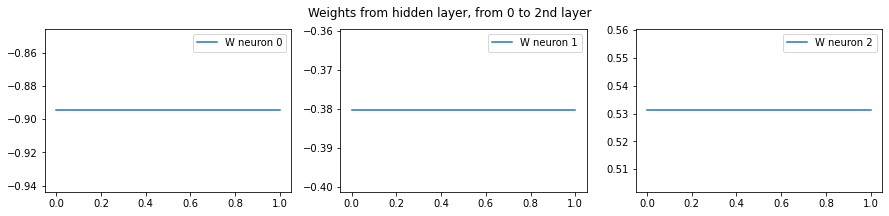

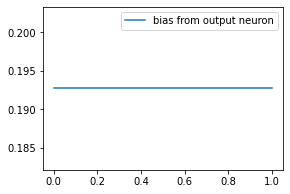

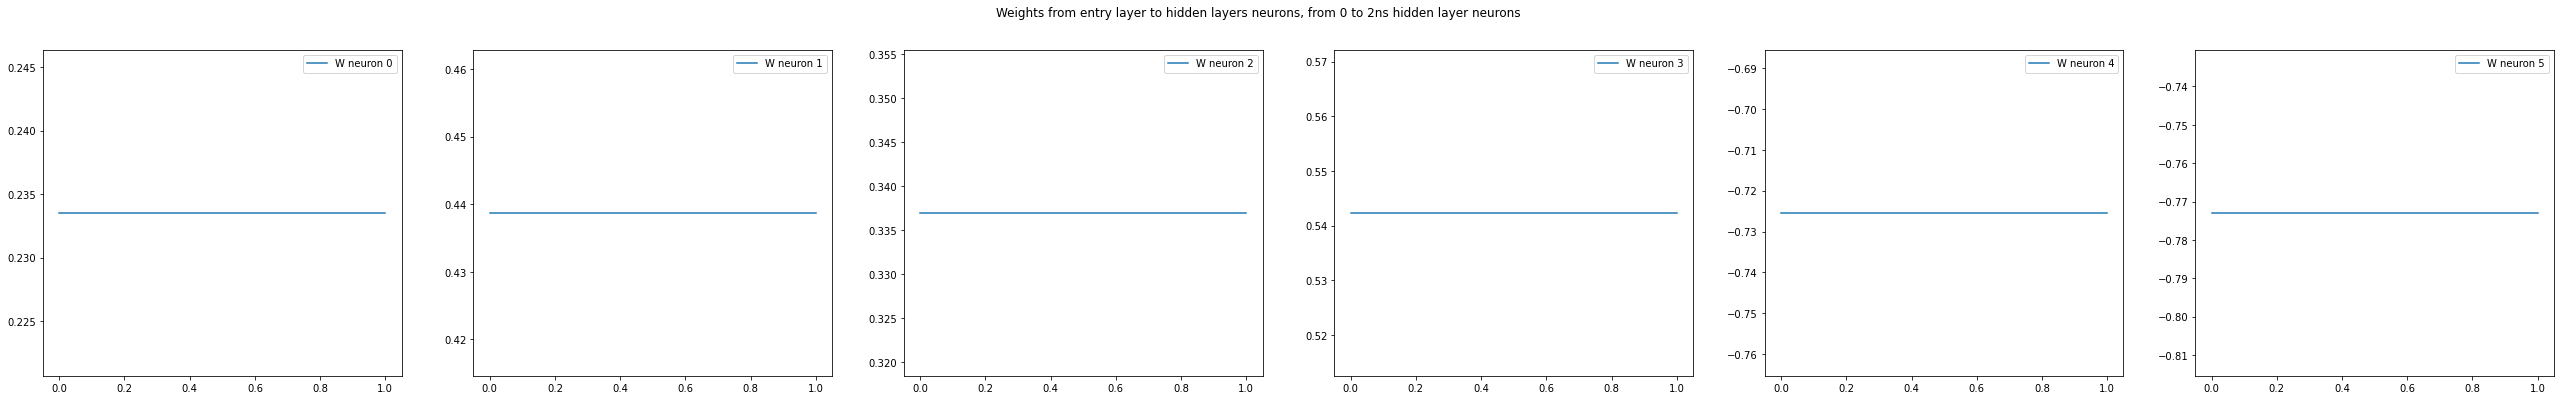

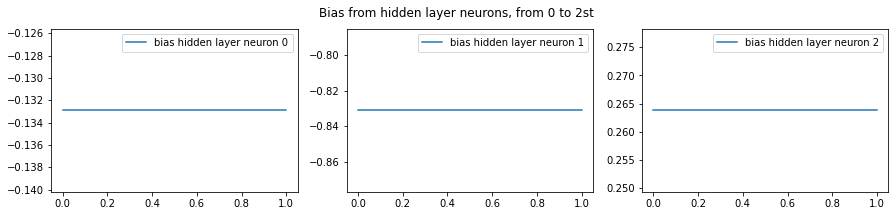

In [10]:
# Just for you to see how graphicaly the weights and bias has changed. [the example]
print_l(history_hyper)

TODO model
all group
learning X number of epochs and all that stuff

## Grouping forward and backward making the model

At this point we have implemented:
- Activation function ($\sigma$)
- Forward propagation
- Backward propagation

What the model has to do:
1. Train
    1. **Forward propagation** with a data set
    2. **Backward propagation**, learn from its result
    3. **Update** hyperparameters
2. Test
    1. **Predict**, this means, given a situation, with what the NN has learned give its output.
    2. **Accuracy**, some times we want to know how well our NN is doing, we do this by comparing the outputs with desired outputs, depending on how many outputs has correct, its accuracy is better or worst.

Step one (Train) is done X time, those X times are the number, of epochs (when you train 1 time the NN with the whole data set) you train the whole data set.
    
_Note: A, B, C should be 1, 2, 3_

In [11]:
def model(X, w, b, Y, epochs=10, print_progress=False, plot_progress=False, plt_all_progress=True, learning_rate=LEARNING_RATE):
    # X - training data set (entries)
    # w - weights
    #     + w[0] - first layer weights
    #     + w[n] - next n layer weights
    # b - bias from training data set
    #     + b[0] - first layer bias
    #     + b[n] - next n layer bias
    # Y - desire output data set
    # epochs - number of repetitions
    # print_progress - print all the progress from each data set
    # plot_progress - plot in a graph the progress

    # Some history if you need it 
    # activation_func_history = [[] for _ in range(len(X))]
    # err_history = [[] for _ in range(len(X))]
    
    history_hyper = [[{"w"+str(i): w[i-1], "b"+str(i): b[i-1]}] for i in range(len(w), 0, -1)]

    # Training
    for i in range(epochs):
        if print_progress:
            print(f"----------------------- epoch {i+1} -----------------------")
        for j in range(len(X)): # j gives us the training set we are using

            # ---------- Forward propagation with each layer ---------- #
            s = []
            # first from entry to first hidden layer
            s.append(forward_propagation(X[j], w[0], b[0]))
            # from each hidden layer that exists to the output layer
            for layer in range(N_LAYERS-1):
                s.append(forward_propagation(s[layer], w[layer+1], b[layer+1]))

            #activation_func_history[j].append(s)
            
            # now we all outputs from each neuron -> s
            #if print_progress:
            #    print(s)
            #    print(f"------------- activation_func_history [{j}] -------------")
            #    print(activation_func_history[j])
            #    print("----------------------------------------------------------")

            # ---------- Backward propagation from output to entries ---------- #
            # first we need to calculate the error from the desire output
            # remmember, here we have the output layer in the first position, not as in the forward prop (s)
            err = []
            err.append(back_prop([s[N_LAYERS-1], s[N_LAYERS-2]], Y=Y[j], learning_rate=learning_rate))
            # next step is to calculate the error each neuron has done
            for layer in range(N_LAYERS-2, 0, -1): # from N_LAYERS-2 to 0
                # N_LAYERS-2 because we did the first step (-1) before, now the next one (-1)
                err.append(back_prop([s[layer], s[layer+1]], w=w[layer+1], last_err=err[layer+1]['err'], learning_rate=learning_rate))

            # last, and more important, calculate the error from weights of entry layer
            err.append(back_prop([s[0], X[j]], w=w[1], last_err=err[0]['err']))
            
            #err_history[j].append(err)
            
            #if print_progress:
            #    print(err)
            #    print(f"------------- activation_func_history [{j}] -------------")
            #    print(err_history[j])
            #    print("----------------------------------------------------------")
                
            # ---------- Update values ---------- #
            # remmember, when we store the error of each layer, we store it from output layer to the first one
            # and w, b is the other way
            for i in range(N_LAYERS):
                weight, bias = update(w[i], err[N_LAYERS-i-1]['del_w'], b[i], err[N_LAYERS-i-1]['del_b'])
                w[i] = weight
                b[i] = bias
                history_hyper[N_LAYERS-i-1].append({f"w{i+1}": weight, f"b{i+1}": bias})
                
        if plot_progress:
            print_l(history_hyper)
    
    if plt_all_progress:
        print_l(history_hyper)
    
    w_b = []
    #print(len(history_hyper[0]))
    #print(history_hyper[0][len(history_hyper[0])-1])
    for i in range(N_LAYERS):
        # print(f"w{N_LAYERS-i}", history_hyper[i][len(history_hyper[i])-1][f"w{N_LAYERS-i}"])
        w_b.append({
            f"w{N_LAYERS-i}": history_hyper[i][len(history_hyper[i])-1][f"w{N_LAYERS-i}"],
            f"b{N_LAYERS-i}": history_hyper[i][len(history_hyper[i])-1][f"b{N_LAYERS-i}"],
        })

    return w_b

[array([[ 0.23353385,  0.43873594],
       [ 0.33700796,  0.5423592 ],
       [-0.72540247, -0.77292228]]), array([[-0.89453732, -0.38039985,  0.53116929]])]
[array([[-0.13289053, -0.83107026,  0.26381393]]), array([[0.19273392]])]


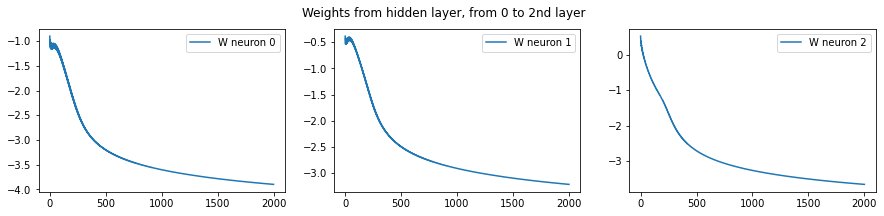

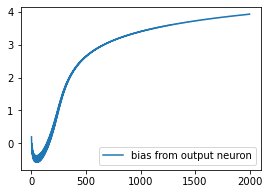

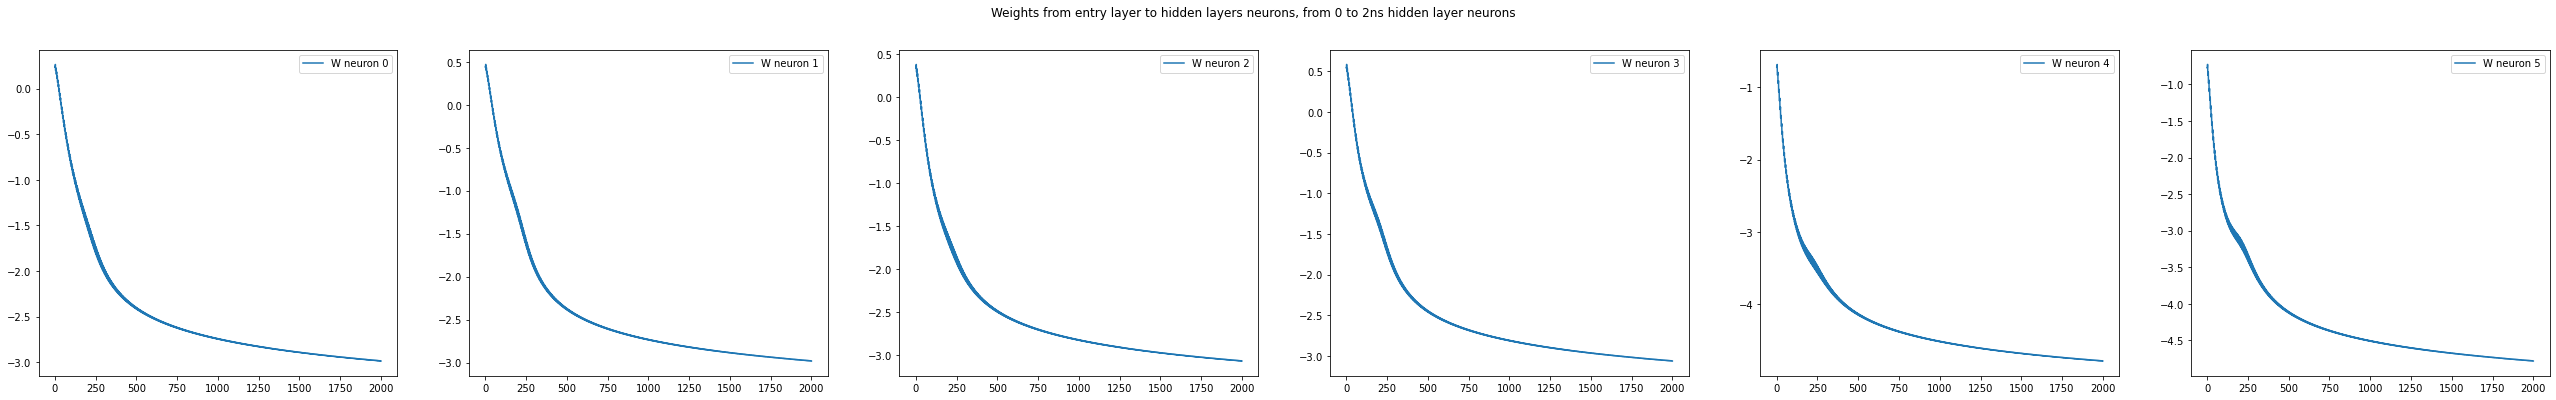

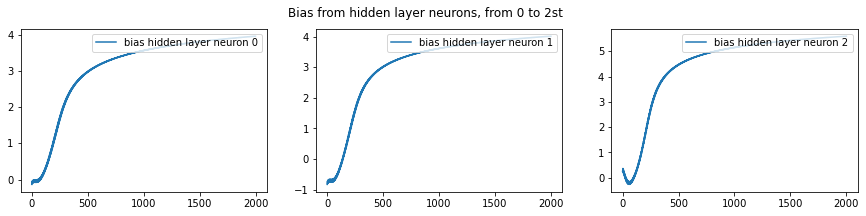

-------------------------------------------------------------------
[array([[-2.98551704, -2.98167311],
       [-3.06957453, -3.06223216],
       [-4.78253484, -4.78223445]]), array([[-3.89661286, -3.22221241, -3.65114231]])]
[array([[3.95325053, 4.01912801, 5.59681215]]), array([[3.93393073]])]


In [12]:
w = [w1, w2]
b = [b1, b2]
print(w)
print(b)
hyper_params_after = model(train_set_X, w, b, train_set_Y, epochs=500, plt_all_progress=True, learning_rate=1.5)

print("-------------------------------------------------------------------")
for i in range(N_LAYERS):
    w[N_LAYERS-i-1] = hyper_params_after[i][f"w{N_LAYERS-i}"]
    b[N_LAYERS-i-1] = hyper_params_after[i][f"b{N_LAYERS-i}"]

print(w)
print(b)

In [13]:
# test_set_X
# test_set_Y
def predict(X, w, b):
    s = []
    # first from entry to first hidden layer
    s.append(forward_propagation(X, w[0], b[0]))
    # from each hidden layer that exists to the output layer
    for layer in range(N_LAYERS-1):
        s.append(forward_propagation(s[layer], w[layer+1], b[layer+1]))

    # print(s[N_LAYERS-1])

    return (1 if s[N_LAYERS-1] > 0.5 else 0)

In [14]:
def accuracy(outputs, desire_outputs):
    correct = 0
    for i in range(len(outputs)):
        if outputs[i] == desire_outputs.squeeze()[i]:
            correct+=1

    return (correct/len(outputs))*100

In [15]:
predictions = [predict(test_set_X[0], w, b), predict(test_set_X[1], w, b), predict(test_set_X[2], w, b)]

print(f'{test_set_X[0].squeeze()[0]} * {test_set_X[0].squeeze()[1]} = {predictions[0]}') # 0
print(f'{test_set_X[1].squeeze()[0]} * {test_set_X[1].squeeze()[1]} = {predictions[1]}') # 0
print(f'{test_set_X[2].squeeze()[0]} * {test_set_X[2].squeeze()[1]} = {predictions[2]}') # 1

acc = accuracy(predictions, test_set_Y)

print(f"Accuracy: {acc}% from {len(predictions)} tests")

0 * 0 = 0
1 * 0 = 0
1 * 1 = 1
Accuracy: 100.0% from 3 tests


# This is all!!!

Hope you understand all.

Also, you can use this model with the OR logic, and try with XOR!!!

Don't forget to change values!! and play with it!!
Try adding a tanh as activation function, or another one!

Give me a Star , that helps me to continue doing these things.

Have a good day, and see you!!

Made by: **@blitty-codes**